In [1]:
#############################################################################
# zlib License
#
# (C) 2024 Cristóvão Beirão da Cruz e Silva <cbeiraod@cern.ch>
#
# This software is provided 'as-is', without any express or implied
# warranty.  In no event will the authors be held liable for any damages
# arising from the use of this software.
#
# Permission is granted to anyone to use this software for any purpose,
# including commercial applications, and to alter it and redistribute it
# freely, subject to the following restrictions:
#
# 1. The origin of this software must not be misrepresented; you must not
#    claim that you wrote the original software. If you use this software
#    in a product, an acknowledgment in the product documentation would be
#    appreciated but is not required.
# 2. Altered source versions must be plainly marked as such, and must not be
#    misrepresented as being the original software.
# 3. This notice may not be removed or altered from any source distribution.
#############################################################################

In [2]:
# FNAL testing notes

In [3]:
import os,sys
path2add = os.path.normpath(os.path.abspath(os.path.join(os.path.curdir, os.path.pardir, './')))
if (not (path2add in sys.path)) :
    sys.path.append(path2add)
print(path2add)
from pathlib import Path
import sqlite3
import pandas
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import mplhep
from math import floor

from SEUhelper import *

import pickle
import numpy
import copy
import tempfile
import shutil

from math import ceil
import numpy as np

/home/daq/ETROC2/ETROC-Analysis/SEU


In [6]:
base_directory = Path("/home/daq/ETROC2/ETROC-Data/NW_SEU_May2025")
output_dir = base_directory/"AnalysisOutput"
output_dir.mkdir(exist_ok=True)
runs = ["0"]
config_compare_dir = output_dir/"I2CConfiguration"
config_compare_dir_granular = output_dir/"I2CConfiguration_Granular"
config_compare_dir.mkdir(exist_ok=True)
config_compare_dir_granular.mkdir(exist_ok=True)

chip_names = ["ET2p03_Bare19","ET2p03_Bare20","ET2p03_Bare21","ET2p03_Bare22",]
channels = [0, 1, 2, 3]

config_directory = Path("/home/daq/ETROC2/ETROC-Data/NW_SEU_May2025/ChipConfig_FNAL")
list_of_all_files = [f for f in os.listdir(config_directory) if os.path.isfile(os.path.join(config_directory,f))]


run_info = []
for run in runs:
    start_times = []
    stop_times  = []
    config_list = []

    for chip_name in chip_names:

        for f in list_of_all_files:

            list_of_words = f.split('_')
            if(len(list_of_words)<6): continue
            if(list_of_words[-2]!=run): continue
            read_chip_name = "_".join(list_of_words[0:2])
            if(read_chip_name!=chip_name): continue
            print(list_of_words)
            time_string = list_of_words[-1].split(".")[0].split("T")
            config_time = datetime.datetime.fromisoformat(list_of_words[-1].split(".")[0])
            config_list += [[f, list_of_words[-1].split(".")[0]]]
            if(list_of_words[2]=="PreRun"):
                start_times += [config_time]
            elif(list_of_words[2]=="PostRun"):
                stop_times += [config_time]
    run_info += [
        {
            "name": f"Run_{run}",
            "extra_begin": start_times[0],
            "start": start_times[0],
            "stop": stop_times[0],
            "boards": chip_names,
            "board_channels": channels,
            "pre_config_times": start_times,
            "post_config_times": stop_times,
            "config_before": True,
            "fluence": 0.0,
            "config_list": sorted(config_list, key=lambda x: x[1])
        }
    ]

test_run_info =  run_info
start_time = datetime.datetime(2024, 5, 28, 0, 0, 0)
end_time = datetime.datetime(2024, 5, 28, 23, 0, 0)

['ET2p03', 'Bare19', 'PreRun', 'Run', '0', '2025-05-01T23:08:57.pckl']
['ET2p03', 'Bare19', 'DuringRun', 'Run', '0', '2025-05-01T23:12:11.pckl']
['ET2p03', 'Bare19', 'PostRun', 'Run', '0', '2025-05-01T23:13:22.pckl']
['ET2p03', 'Bare20', 'PreRun', 'Run', '0', '2025-05-01T23:09:06.pckl']
['ET2p03', 'Bare20', 'DuringRun', 'Run', '0', '2025-05-01T23:12:20.pckl']
['ET2p03', 'Bare20', 'PostRun', 'Run', '0', '2025-05-01T23:13:30.pckl']
['ET2p03', 'Bare21', 'PreRun', 'Run', '0', '2025-05-01T23:09:15.pckl']
['ET2p03', 'Bare21', 'PostRun', 'Run', '0', '2025-05-01T23:13:39.pckl']
['ET2p03', 'Bare21', 'DuringRun', 'Run', '0', '2025-05-01T23:12:28.pckl']
['ET2p03', 'Bare22', 'PreRun', 'Run', '0', '2025-05-01T23:09:24.pckl']
['ET2p03', 'Bare22', 'DuringRun', 'Run', '0', '2025-05-01T23:12:37.pckl']
['ET2p03', 'Bare22', 'PostRun', 'Run', '0', '2025-05-01T23:13:48.pckl']


In [7]:
run_info

[{'name': 'Run_0',
  'extra_begin': datetime.datetime(2025, 5, 1, 23, 8, 57),
  'start': datetime.datetime(2025, 5, 1, 23, 8, 57),
  'stop': datetime.datetime(2025, 5, 1, 23, 13, 22),
  'boards': ['ET2p03_Bare19',
   'ET2p03_Bare20',
   'ET2p03_Bare21',
   'ET2p03_Bare22'],
  'board_channels': [0, 1, 2, 3],
  'pre_config_times': [datetime.datetime(2025, 5, 1, 23, 8, 57),
   datetime.datetime(2025, 5, 1, 23, 9, 6),
   datetime.datetime(2025, 5, 1, 23, 9, 15),
   datetime.datetime(2025, 5, 1, 23, 9, 24)],
  'post_config_times': [datetime.datetime(2025, 5, 1, 23, 13, 22),
   datetime.datetime(2025, 5, 1, 23, 13, 30),
   datetime.datetime(2025, 5, 1, 23, 13, 39),
   datetime.datetime(2025, 5, 1, 23, 13, 48)],
  'config_before': True,
  'fluence': 0.0,
  'config_list': [['ET2p03_Bare19_PreRun_Run_0_2025-05-01T23:08:57.pckl',
    '2025-05-01T23:08:57'],
   ['ET2p03_Bare20_PreRun_Run_0_2025-05-01T23:09:06.pckl',
    '2025-05-01T23:09:06'],
   ['ET2p03_Bare21_PreRun_Run_0_2025-05-01T23:09:15.p

# I2C Config

In [8]:
accumulated_status_map = {}
accumulated_config_map = {}
accumulated_bitmap = {}

base_bitmap = {
}
for idx in range(32):
    base_bitmap[f'PeriCfg{idx}']  = [0 for _ in range(8)]
for idx in range(16):
    base_bitmap[f'PeriStat{idx}'] = [0 for _ in range(8)]
for idx in range(32):
    base_bitmap[f'PixCfg{idx}']   = [0 for _ in range(8)]
for idx in range(8):
    base_bitmap[f'PixStat{idx}']  = [0 for _ in range(8)]

extra_bitmap = {}

counter = 0
for this_run_idx in range(len(run_info)):
    counter += 1
    #if counter == 2:
    #    break
    #if counter < 4:
    #    continue
    this_run_info = run_info[this_run_idx]
    this_run_name = this_run_info["name"]

    this_run_dir = config_compare_dir/this_run_name
    this_run_dir.mkdir(exist_ok=True)

    for board_idx in range(len(this_run_info["boards"])):
        board_name = this_run_info["boards"][board_idx]

        if board_name not in accumulated_bitmap:
            accumulated_bitmap[board_name] = copy.deepcopy(base_bitmap)

        pre_config_time  = this_run_info[ "pre_config_times"][board_idx]
        post_config_time = this_run_info["post_config_times"][board_idx]

        if post_config_time is None:
            print(f'No post config time for board {board_name} for run {this_run_name}')
            continue

        if pre_config_time is None:
            if "config_before" in this_run_info and not this_run_info["config_before"]:
                for offset in range(this_run_idx):
                    previous_run_info = run_info[this_run_idx - 1 - offset]

                    previous_board_idx = None
                    for idx in range(len(previous_run_info["boards"])):
                        if board_name == previous_run_info["boards"][idx]:
                            previous_board_idx = idx
                            break

                    if previous_board_idx is None:
                        print("Perhaps this should be a break")
                        continue  #  TODO: Perhaps this should be a break

                    pre_config_time = previous_run_info["post_config_times"][previous_board_idx]

                    if pre_config_time is not None:
                        break

                    if "config_before" in previous_run_info and not previous_run_info["config_before"]:
                        continue
                    break

            if pre_config_time is None:
                print(f'No pre config time for board {board_name} for run {this_run_name}')
                continue

        pre_time_tag  =  pre_config_time.isoformat()
        post_time_tag =  post_config_time.isoformat()

        pre_time_file  = list(config_directory.glob(f'*{pre_time_tag}*'))
        post_time_file = list(config_directory.glob(f'*{post_time_tag}*'))
        if len(pre_time_file) == 0:
            print(f"Couldn't find the pre-time configuration file for board {board_name} for run {this_run_name}")
            continue
        if len(post_time_file) == 0:
            print(f"Couldn't find the post-time configuration file for board {board_name} for run {this_run_name}")
            continue
        if len(pre_time_file) > 1:
            print(f"Found too many pre-time configuration files for board {board_name} for run {this_run_name}")
            continue
        if len(post_time_file) > 1:
            print(f"Found too many post-time configuration files for board {board_name} for run {this_run_name}")
            continue
        pre_time_file  =  pre_time_file[0]
        post_time_file = post_time_file[0]

        print(f'{this_run_name} - {board_name}: PreRun {pre_time_file}; PostRun {post_time_file}')

        changed_registers = diff_chip_configs(pre_time_file, post_time_file)
        print(changed_registers)
        save_changed_config(changed_registers, this_run_dir, f"changedRegisters_{board_name.replace(' ', '_')}")

        status_map, config_map = get_pixel_bitflip_map(changed_registers)
        plot_map(status_map, f"Pixel Status Bit Flips on {board_name} during Run {this_run_name}", 'Bit Flips', this_run_dir/f"{board_name}_Status.pdf")
        plot_map(config_map, f"Pixel Config Bit Flips on {board_name} during Run {this_run_name}", 'Bit Flips', this_run_dir/f"{board_name}_Config.pdf")

        this_bitmap = copy.deepcopy(base_bitmap)
        other_bitmap = {}
        fill_bitmap(changed_registers, this_bitmap, other_bitmap)
        save_bitmap_table(this_bitmap, this_run_dir, f"{board_name}") ## This function might be an issue because of latex

        for key in other_bitmap:
            if key not in extra_bitmap:
                extra_bitmap[key] = [0 for _ in range(8)]
            for idx in range(8):
                extra_bitmap[key][idx] += other_bitmap[key][idx]
        for key in this_bitmap:
            for idx in range(8):
                accumulated_bitmap[board_name][key][idx] += this_bitmap[key][idx]

        if board_name not in accumulated_status_map:
            accumulated_status_map[board_name] = status_map
        else:
            for row in range(16):
                for col in range(16):
                    accumulated_status_map[board_name][row][col] += status_map[row][col]
        if board_name not in accumulated_config_map:
            accumulated_config_map[board_name] = config_map
        else:
            for row in range(16):
                for col in range(16):
                    accumulated_config_map[board_name][row][col] += config_map[row][col]

#print(extra_bitmap)
#print(accumulated_bitmap)

if len(extra_bitmap) != 0:
    with open(config_compare_dir/("extra_registers_bitflips.pickle"), "wb") as file:
        pickle.dump(extra_bitmap, file)

    with open(config_compare_dir/("extra_registers_bitflips.txt"), "w") as file:
        file.write("The bits in unnamed registers saw the following amount of bit flips:")
        for register in extra_bitmap:
            file.write(f" - {register}: {extra_bitmap[register]}")

# This function might be an issue because of latex
total_bitmap = copy.deepcopy(base_bitmap)
for board_name in accumulated_bitmap:
    save_bitmap_table(accumulated_bitmap[board_name], config_compare_dir, f"{board_name}") ## This function might be an issue because of latex
    for key in accumulated_bitmap[board_name]:
        for idx in range(8):
            total_bitmap[key][idx] += accumulated_bitmap[board_name][key][idx]
save_bitmap_table(total_bitmap, config_compare_dir, "Total") ## This function might be an issue because of latex

for board_name in accumulated_status_map:
    plot_map(accumulated_status_map[board_name], f"Pixel Status Bit Flips on {board_name} over all Runs", 'Bit Flips', config_compare_dir/f"{board_name}_Status.pdf")
for board_name in accumulated_config_map:
    plot_map(accumulated_config_map[board_name], f"Pixel Config Bit Flips on {board_name} over all Runs", 'Bit Flips', config_compare_dir/f"{board_name}_Config.pdf")


Run_0 - ET2p03_Bare19: PreRun /home/daq/ETROC2/ETROC-Data/NW_SEU_May2025/ChipConfig_FNAL/ET2p03_Bare19_PreRun_Run_0_2025-05-01T23:08:57.pckl; PostRun /home/daq/ETROC2/ETROC-Data/NW_SEU_May2025/ChipConfig_FNAL/ET2p03_Bare19_PostRun_Run_0_2025-05-01T23:13:22.pckl
{'ETROC2': {}, 'Waveform Sampler': {}}
Run_0 - ET2p03_Bare20: PreRun /home/daq/ETROC2/ETROC-Data/NW_SEU_May2025/ChipConfig_FNAL/ET2p03_Bare20_PreRun_Run_0_2025-05-01T23:09:06.pckl; PostRun /home/daq/ETROC2/ETROC-Data/NW_SEU_May2025/ChipConfig_FNAL/ET2p03_Bare20_PostRun_Run_0_2025-05-01T23:13:30.pckl
{'ETROC2': {}, 'Waveform Sampler': {}}
Run_0 - ET2p03_Bare21: PreRun /home/daq/ETROC2/ETROC-Data/NW_SEU_May2025/ChipConfig_FNAL/ET2p03_Bare21_PreRun_Run_0_2025-05-01T23:09:15.pckl; PostRun /home/daq/ETROC2/ETROC-Data/NW_SEU_May2025/ChipConfig_FNAL/ET2p03_Bare21_PostRun_Run_0_2025-05-01T23:13:39.pckl
{'ETROC2': {256: (38, 166)}, 'Waveform Sampler': {}}
Run_0 - ET2p03_Bare22: PreRun /home/daq/ETROC2/ETROC-Data/NW_SEU_May2025/ChipConfig

In [9]:
accumulated_status_map = {}
accumulated_config_map = {}
accumulated_bitmap = {}

base_bitmap = {
}
for idx in range(32):
    base_bitmap[f'PeriCfg{idx}']  = [0 for _ in range(8)]
for idx in range(16):
    base_bitmap[f'PeriStat{idx}'] = [0 for _ in range(8)]
for idx in range(32):
    base_bitmap[f'PixCfg{idx}']   = [0 for _ in range(8)]
for idx in range(8):
    base_bitmap[f'PixStat{idx}']  = [0 for _ in range(8)]

extra_bitmap = {}

counter = 0
for this_run_idx in range(len(run_info)):
    counter += 1

    run_accumulated_status_map = {}
    run_accumulated_config_map = {}
    run_accumulated_bitmap = {}
    this_run_info = run_info[this_run_idx]
    this_run_name = this_run_info["name"]
    this_run_config_list = this_run_info["config_list"]

    this_run_dir = config_compare_dir_granular/this_run_name
    this_run_dir.mkdir(exist_ok=True)

    for board_idx in range(len(this_run_info["boards"])):
        board_name = this_run_info["boards"][board_idx]

        if board_name not in accumulated_bitmap:
            accumulated_bitmap[board_name] = copy.deepcopy(base_bitmap)
        if board_name not in run_accumulated_bitmap:
            run_accumulated_bitmap[board_name] = copy.deepcopy(base_bitmap)

        pre_time_file  = list(config_directory.glob(f'*{pre_time_tag}*'))

        print(f'{this_run_name} - {board_name}')

        for config_idx in range(1, len(this_run_config_list)):
            pre_file  = list(config_directory.glob(f'*{this_run_config_list[config_idx-1][0]}*'))[0]
            post_file = list(config_directory.glob(f'*{this_run_config_list[config_idx][0]}*'))[0]
            changed_registers = diff_chip_configs(pre_file, post_file)
            save_changed_config(changed_registers, this_run_dir, f"changedRegisters_{board_name.replace(' ', '_')}_pass_{config_idx}")
            status_map, config_map = get_pixel_bitflip_map(changed_registers)
            this_bitmap = copy.deepcopy(base_bitmap)
            other_bitmap = {}
            fill_bitmap(changed_registers, this_bitmap, other_bitmap)

            for key in other_bitmap:
                if key not in extra_bitmap:
                    extra_bitmap[key] = [0 for _ in range(8)]
                for idx in range(8):
                    extra_bitmap[key][idx] += other_bitmap[key][idx]
            for key in this_bitmap:
                for idx in range(8):
                    run_accumulated_bitmap[board_name][key][idx] += this_bitmap[key][idx]
                    accumulated_bitmap[board_name][key][idx] += this_bitmap[key][idx]

            if board_name not in accumulated_status_map:
                accumulated_status_map[board_name] = status_map
            else:
                for row in range(16):
                    for col in range(16):
                        accumulated_status_map[board_name][row][col] += status_map[row][col]
            if board_name not in accumulated_config_map:
                accumulated_config_map[board_name] = config_map
            else:
                for row in range(16):
                    for col in range(16):
                        accumulated_config_map[board_name][row][col] += config_map[row][col]
            if board_name not in run_accumulated_status_map:
                run_accumulated_status_map[board_name] = status_map
            else:
                for row in range(16):
                    for col in range(16):
                        run_accumulated_status_map[board_name][row][col] += status_map[row][col]
            if board_name not in run_accumulated_config_map:
                run_accumulated_config_map[board_name] = config_map
            else:
                for row in range(16):
                    for col in range(16):
                        run_accumulated_config_map[board_name][row][col] += config_map[row][col]
        
    run_total_bitmap = copy.deepcopy(base_bitmap)
    for board_name in run_accumulated_bitmap:
        save_bitmap_table(run_accumulated_bitmap[board_name], this_run_dir, f"Run {this_run_name} {board_name}") ## This function might be an issue because of latex
        for key in run_accumulated_bitmap[board_name]:
            for idx in range(8):
                run_total_bitmap[key][idx] += run_accumulated_bitmap[board_name][key][idx]
    save_bitmap_table(run_total_bitmap, this_run_dir, f"Total Run {this_run_name}") ## This function might be an issue because of latex

    for board_name in run_accumulated_status_map:
        plot_map(run_accumulated_status_map[board_name], f"Pixel Status Bit Flips on {board_name} over Run {this_run_name} over all Saves", 'Bit Flips', this_run_dir/f"{board_name}_Status.pdf")
    for board_name in run_accumulated_config_map:
        plot_map(run_accumulated_config_map[board_name], f"Pixel Config Bit Flips on {board_name} over Run {this_run_name} over all Saves", 'Bit Flips', this_run_dir/f"{board_name}_Config.pdf")

if len(extra_bitmap) != 0:
    with open(config_compare_dir_granular/("extra_registers_bitflips.pickle"), "wb") as file:
        pickle.dump(extra_bitmap, file)

    with open(config_compare_dir_granular/("extra_registers_bitflips.txt"), "w") as file:
        file.write("The bits in unnamed registers saw the following amount of bit flips:")
        for register in extra_bitmap:
            file.write(f" - {register}: {extra_bitmap[register]}")

total_bitmap = copy.deepcopy(base_bitmap)
for board_name in accumulated_bitmap:
    save_bitmap_table(accumulated_bitmap[board_name], config_compare_dir_granular, f"{board_name}") ## This function might be an issue because of latex
    for key in accumulated_bitmap[board_name]:
        for idx in range(8):
            total_bitmap[key][idx] += accumulated_bitmap[board_name][key][idx]
save_bitmap_table(total_bitmap, config_compare_dir_granular, "Total") ## This function might be an issue because of latex

for board_name in accumulated_status_map:
    plot_map(accumulated_status_map[board_name], f"Pixel Status Bit Flips on {board_name} over all Runs", 'Bit Flips', config_compare_dir_granular/f"{board_name}_Status.pdf")
for board_name in accumulated_config_map:
    plot_map(accumulated_config_map[board_name], f"Pixel Config Bit Flips on {board_name} over all Runs", 'Bit Flips', config_compare_dir_granular/f"{board_name}_Config.pdf")


Run_0 - ET2p03_Bare19
Run_0 - ET2p03_Bare20
Run_0 - ET2p03_Bare21
Run_0 - ET2p03_Bare22


# Data

In [10]:
import sys, os
path2add = os.path.normpath(os.path.abspath(os.path.join(os.path.curdir, os.path.pardir, '../TestBeam')))
if (not (path2add in sys.path)) :
    sys.path.append(path2add)
print(path2add)
from beamtest_analysis_helper import DecodeBinary
from beamtest_analysis_helper import return_hist, return_event_hist, plot_1d_TDC_histograms
from natsort import natsorted

translated_dir = output_dir/"Translated"
translated_dir.mkdir(exist_ok=True)
plot_dir = output_dir/"TDCPlots"
plot_dir.mkdir(exist_ok=True)

/home/daq/ETROC2/ETROC-Analysis/TestBeam


## Translate RAW data

In [11]:
def translateRun(this_run_info: dict, save_dir: Path):
    this_run_name = this_run_info["name"]
    this_run_dir: Path = base_directory/Path("FNAL")/this_run_name

    if not this_run_dir.is_dir():
        raise RuntimeError(f"The directory for run {this_run_name} does not exist. Expected: {this_run_dir}")

    print(f"Translating data for run {this_run_name}")
    this_run_files = natsorted(list(this_run_dir.glob("*.bin")))

    decoder = DecodeBinary(
        firmware_key=0b0001,
        board_id = [0x17f0f, 0x17f0f, 0x17f0f, 0x17f0f],
        file_list = this_run_files,
        save_nem = None,
        skip_fw_filler = True,
        skip_crc_df = True,
        verbose = True
    )
    dataframe, event_dataframe, _, filler_dataframe = decoder.decode_files()
    print(f"Saving data for run {this_run_name}")

    #dataframe.to_feather(save_dir/f"{this_run_name}.feather")
    with sqlite3.connect(save_dir/f"{this_run_name}.sqlite") as sqlite3_connection:
        dataframe = dataframe.drop(columns=['bcid', 'l1a_counter'])
        dataframe.to_sql('hit_data', sqlite3_connection, if_exists='replace', index=False)
        event_dataframe.to_sql('event_data', sqlite3_connection, if_exists='replace', index=False)
        filler_dataframe.to_sql('filler_data', sqlite3_connection, if_exists='replace', index=False)

counter = 0
for this_run_info in run_info:
    translateRun(this_run_info, translated_dir)
    counter += 1
    #if counter == 2:
    #    break

# for this_run_info in extra_run_info:
#     translateRun(this_run_info, translated_dir)

# for this_run_info in test_run_info:
#     translateRun(this_run_info, translated_dir)

Translating data for run Run_0
Saving data for run Run_0


## Make per run TDC Plots

In [12]:
def plotRunSummary(this_run_info: dict, translated_dir: Path, save_dir: Path, tb_loc: str, ps_see_time: datetime.datetime | None = None, print_info: bool = False):
    this_run_name = this_run_info["name"]
    this_run_dir: Path = base_directory/Path("FNAL")/this_run_name
    this_run_plot_dir = save_dir/this_run_name
    this_run_plot_dir.mkdir(exist_ok=True)

    if not this_run_dir.is_dir():
        raise RuntimeError(f"The directory for run {this_run_name} does not exist. Expected: {this_run_dir}")

    #dataframe = pandas.read_feather(translated_dir/f"{this_run_name}.feather")
    with sqlite3.connect(translated_dir/f"{this_run_name}.sqlite") as sqlite3_connection:
        dataframe = pandas.read_sql('SELECT * FROM hit_data', sqlite3_connection, index_col=None)
        event_dataframe = pandas.read_sql('SELECT * FROM event_data', sqlite3_connection, index_col=None)

    if len(dataframe) == 0:
        print('dataframe is empty!')
        return

    filtered_df = dataframe.loc[(dataframe["tot"] - dataframe["tot"].mean()).abs() > 2*dataframe["tot"].std()].copy()
    off_peak_hits = len(filtered_df)

    if print_info:
        print(f"All hits on all boards: {len(dataframe)}")
        print(f"Hits not in main TOT peak: {off_peak_hits}")

    board_labels = this_run_info["boards"]
    board_names = [i.replace(" ", "_") for i in board_labels]
    board_channels = this_run_info["board_channels"]
    this_run_hists = return_hist(dataframe, board_channels, board_names, hist_bins=[100, 128, 128])
    this_event_hist = return_event_hist(event_dataframe)
    filtered_run_hists = return_hist(filtered_df, board_channels, board_names, hist_bins=[100, 128, 128])

    for board_idx in range(len(board_labels)):
        plot_1d_TDC_histograms(this_run_hists, board_names[board_idx], tb_loc=tb_loc, fig_tag=", inclusive", slide_friendly=True, event_hist=this_event_hist, save_mother_dir=this_run_plot_dir, tag="inclusive")
        plot_1d_TDC_histograms(this_run_hists, board_names[board_idx], tb_loc=tb_loc, fig_tag=", inclusive", slide_friendly=True, do_logy=True, event_hist=this_event_hist, save_mother_dir=this_run_plot_dir, tag="inclusive_logy")
        plot_1d_TDC_histograms(this_run_hists, board_names[board_idx], tb_loc=tb_loc, fig_tag=", inclusive", slide_friendly=True, event_hist=this_event_hist, save_mother_dir=this_run_plot_dir, tag="inclusive")
        plot_1d_TDC_histograms(this_run_hists, board_names[board_idx], tb_loc=tb_loc, fig_tag=", inclusive", slide_friendly=True, do_logy=True, event_hist=this_event_hist, save_mother_dir=this_run_plot_dir, tag="inclusive_logy")

        if off_peak_hits > 0:
            plot_1d_TDC_histograms(filtered_run_hists, board_names[board_idx], tb_loc=tb_loc, fig_tag=", filtered TOT peak", slide_friendly=True,
                                   save_mother_dir=this_run_plot_dir, tag="filtered_tot_peak")
            plot_1d_TDC_histograms(filtered_run_hists, board_names[board_idx], tb_loc=tb_loc, fig_tag=", filtered TOT peak", slide_friendly=True, do_logy = True,
                                   save_mother_dir=this_run_plot_dir, tag="filtered_tot_peak_logy")
            plot_1d_TDC_histograms(filtered_run_hists, board_names[board_idx], tb_loc=tb_loc, fig_tag=", filtered TOT peak", slide_friendly=True,
                                   save_mother_dir=this_run_plot_dir, tag="filtered_tot_peak")
            plot_1d_TDC_histograms(filtered_run_hists, board_names[board_idx], tb_loc=tb_loc, fig_tag=", filtered TOT peak", slide_friendly=True, do_logy = True,
                                   save_mother_dir=this_run_plot_dir, tag="filtered_tot_peak_logy")

    # counts = event_dataframe['hamming_count'].unique()
    # if len(counts) > 1:
    #    for hamming_count in counts:
    #        filtered_event_df = event_dataframe.loc[event_dataframe['hamming_count'] == hamming_count]

    #        print(filtered_event_df)
    #        filtered_df = dataframe[dataframe['evt'].isin(filtered_event_df['evt'])].copy()
    #        print(filtered_df)

    values = dataframe['ea'].unique()
    if len(values) > 1:
        for hamming_code in values:
            filtered_df    = dataframe.loc[dataframe['ea'] == hamming_code].copy()
            filtered_hists = return_hist(filtered_df, board_channels, board_names, hist_bins=[100, 128, 128])

            for board_idx in range(len(board_labels)):
                plot_1d_TDC_histograms(filtered_hists, board_names[board_idx], tb_loc=tb_loc, fig_tag=f", Hamming Code {hamming_code:#04b}", slide_friendly=False,
                                       save_mother_dir=this_run_plot_dir, tag=f"hamming_code_{hamming_code}")
                plot_1d_TDC_histograms(filtered_hists, board_names[board_idx], tb_loc=tb_loc, fig_tag=f", Hamming Code {hamming_code:#04b}", slide_friendly=False, do_logy = True,
                                       save_mother_dir=this_run_plot_dir, tag=f"hamming_code_{hamming_code}_logy")
                plot_1d_TDC_histograms(filtered_hists, board_names[board_idx], tb_loc=tb_loc, fig_tag=f", Hamming Code {hamming_code:#04b}", slide_friendly=True,
                                       save_mother_dir=this_run_plot_dir, tag=f"hamming_code_{hamming_code}")
                plot_1d_TDC_histograms(filtered_hists, board_names[board_idx], tb_loc=tb_loc, fig_tag=f", Hamming Code {hamming_code:#04b}", slide_friendly=True, do_logy = True,
                                       save_mother_dir=this_run_plot_dir, tag=f"hamming_code_{hamming_code}_logy")

    run_start = this_run_info['start']
    run_stop  = this_run_info['stop']

    ##   It seems that after the PS SEE, data was no longer being recorded, so it doesn't
    ## make sense to filter the events based on the fraction of total events between good
    ## events (before PS SEE) and bad events (after PS SEE)
    #if ps_see_time > run_start and ps_see_time < run_stop:
    #    run_duration = (run_stop - run_start)
    #    percentage_good = (ps_see_time - run_start)/run_duration

    #    total_rows = len(dataframe)
    #    good_rows = floor(total_rows * percentage_good * 0.95)  # Add a 5% safety factor
    #    bad_rows = floor(total_rows * (1 - percentage_good) * 0.95)

    #    good_df = dataframe.iloc[:good_rows]
    #    bad_df = dataframe.iloc[-bad_rows:]

    #    good_run_hists = return_hist(good_df, board_names, board_channels, hist_bins=[100, 128, 128])
    #    bad_run_hists  = return_hist(bad_df, board_names, board_channels, hist_bins=[100, 128, 128])

    #    for board_idx in range(len(board_labels)):
    #        #plot_1d_TDC_histograms(good_run_hists, board_names[board_idx], board_names[board_idx], board_labels[board_idx], this_run_plot_dir, save=True, tag="inclusive_good", fig_tag=" good, inclusive", slide_friendly=False)
    #        plot_1d_TDC_histograms(good_run_hists, board_names[board_idx], board_names[board_idx], board_labels[board_idx], this_run_plot_dir, save=True, tag="inclusive_good", fig_tag=" good, inclusive", slide_friendly=True, event_hist=this_event_hist)
    #        plot_1d_TDC_histograms(good_run_hists, board_names[board_idx], board_names[board_idx], board_labels[board_idx], this_run_plot_dir, save=True, tag="inclusive_logy_good", fig_tag=" good, inclusive", slide_friendly=True, do_logy = True, event_hist=this_event_hist)

    #        #plot_1d_TDC_histograms(bad_run_hists, board_names[board_idx], board_names[board_idx], board_labels[board_idx], this_run_plot_dir, save=True, tag="inclusive_bad", fig_tag=" bad, inclusive", slide_friendly=False)
    #        plot_1d_TDC_histograms(bad_run_hists, board_names[board_idx], board_names[board_idx], board_labels[board_idx], this_run_plot_dir, save=True, tag="inclusive_bad", fig_tag=" bad, inclusive", slide_friendly=True, event_hist=this_event_hist)
    #        plot_1d_TDC_histograms(bad_run_hists, board_names[board_idx], board_names[board_idx], board_labels[board_idx], this_run_plot_dir, save=True, tag="inclusive_logy_bad", fig_tag=" bad, inclusive", slide_friendly=True, do_logy = True, event_hist=this_event_hist)

counter = 0
for this_run_info in run_info:
    counter += 1
    print(f"""Run {counter} {this_run_info["name"]}""")
    #if counter == 12:
    #    break
    #if counter < 11:
    #    continue
    plotRunSummary(this_run_info, translated_dir, plot_dir, "nw", True)

# for this_run_info in extra_run_info:
#     plotRunSummary(this_run_info, translated_dir, plot_dir, ps_see_time)

# for this_run_info in test_run_info:
#     plotRunSummary(this_run_info, translated_dir, plot_dir, ps_see_time)


Run 1 Run_0
Unknown location. Please add info into the function. Return empty string
Unknown location. Please add info into the function. Return empty string
Unknown location. Please add info into the function. Return empty string
Unknown location. Please add info into the function. Return empty string
Unknown location. Please add info into the function. Return empty string
Unknown location. Please add info into the function. Return empty string
Unknown location. Please add info into the function. Return empty string
Unknown location. Please add info into the function. Return empty string
Unknown location. Please add info into the function. Return empty string
Unknown location. Please add info into the function. Return empty string
Unknown location. Please add info into the function. Return empty string
Unknown location. Please add info into the function. Return empty string
Unknown location. Please add info into the function. Return empty string
Unknown location. Please add info into 

/home/daq/.local/lib/python3.10/site-packages/mplhep/utils.py:481: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/home/daq/.local/lib/python3.10/site-packages/mplhep/utils.py:481: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/home/daq/.local/lib/python3.10/site-packages/mplhep/utils.py:481: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


Unknown location. Please add info into the function. Return empty string


/home/daq/.local/lib/python3.10/site-packages/mplhep/utils.py:481: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/home/daq/ETROC2/ETROC-Analysis/TestBeam/beamtest_analysis_helper.py:2140: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')
/home/daq/.local/lib/python3.10/site-packages/mplhep/utils.py:481: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/home/daq/ETROC2/ETROC-Analysis/TestBeam/beamtest_analysis_helper.py:2145: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')
/home/daq/.local/lib/python3.10/site-packages/mplhep/utils.py:481: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/home/daq/ETROC2/ETROC-Analysi

Unknown location. Please add info into the function. Return empty string


/home/daq/.local/lib/python3.10/site-packages/mplhep/utils.py:481: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/home/daq/.local/lib/python3.10/site-packages/mplhep/utils.py:481: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/home/daq/.local/lib/python3.10/site-packages/mplhep/utils.py:481: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


Unknown location. Please add info into the function. Return empty string


/home/daq/.local/lib/python3.10/site-packages/mplhep/utils.py:481: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/home/daq/ETROC2/ETROC-Analysis/TestBeam/beamtest_analysis_helper.py:2140: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')
/home/daq/.local/lib/python3.10/site-packages/mplhep/utils.py:481: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/home/daq/ETROC2/ETROC-Analysis/TestBeam/beamtest_analysis_helper.py:2145: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')
/home/daq/.local/lib/python3.10/site-packages/mplhep/utils.py:481: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/home/daq/ETROC2/ETROC-Analysi

## Make trigger rate plot

In [13]:
from beamtest_analysis_helper import load_fig_title
import mplhep as hep
hep.style.use('CMS')

Run 1 Run_0


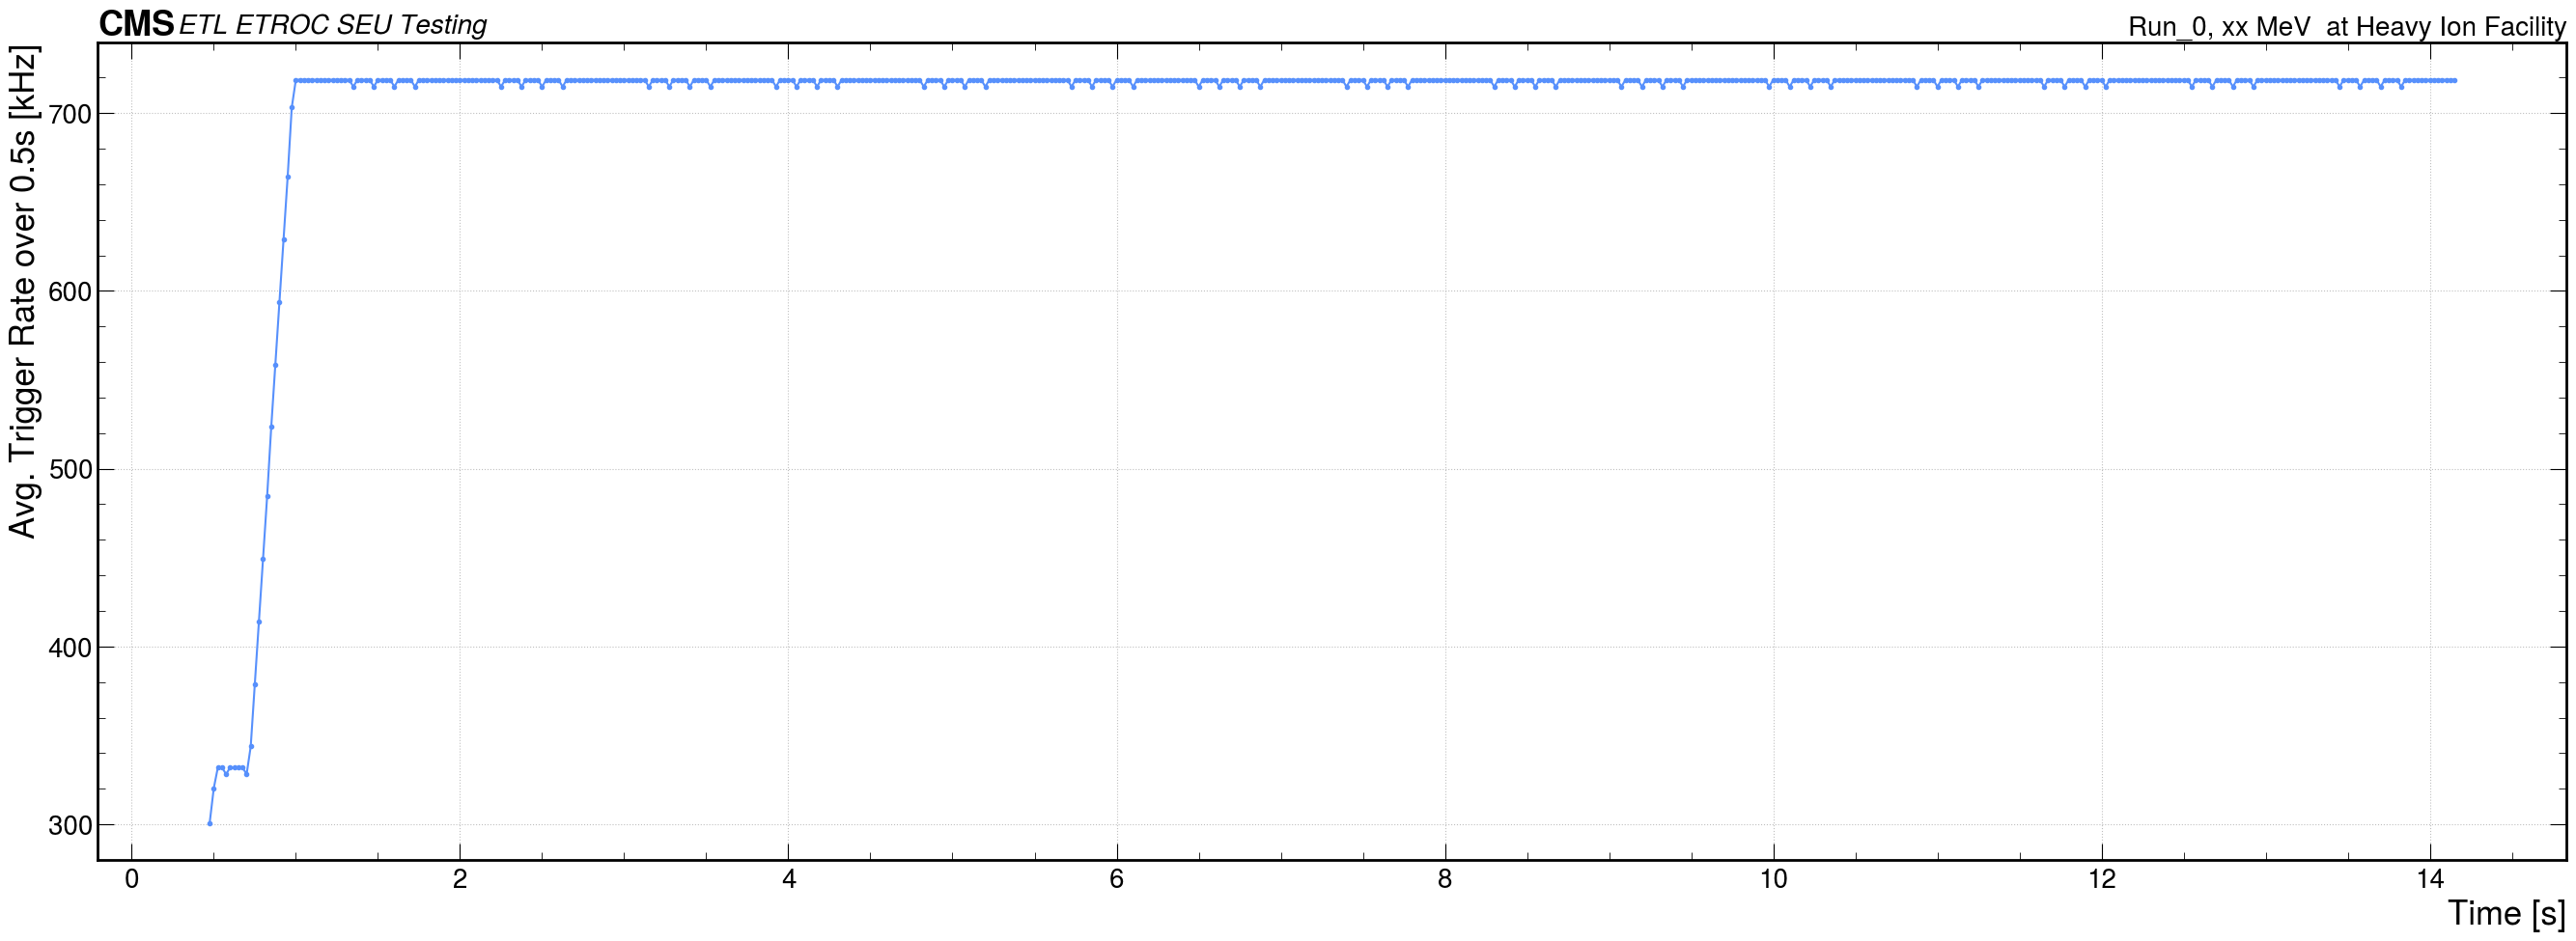

In [14]:
prescale = 2048
window_size = 20
runs = ["0"]

counter = 0
for this_run in runs:
    counter += 1
    print(f"""Run {counter} Run_{this_run}""")
    #if counter == 12:
    #    break
    #if counter < 11:
    #    continue
    # plotRunSummary(this_run_info, translated_dir, plot_dir, "louvain", True)
    with sqlite3.connect(translated_dir/f"""Run_{this_run}.sqlite""") as sqlite3_connection:
        filler_dataframe = pandas.read_sql('SELECT * FROM filler_data', sqlite3_connection, index_col=None)

        avg_df = filler_dataframe['events'].rolling(window=window_size).sum().to_frame(name='avg').reset_index()

        plot_title = load_fig_title(tb_loc='louvain')

        fig, ax = plt.subplots(figsize=(33, 11))
        hep.cms.text(loc=0, ax=ax, text="ETL ETROC SEU Testing", fontsize=20)
        ax.set_title(f'Run_{this_run}, {plot_title}', loc='right', fontsize=20)
        ax.plot(avg_df['index']*0.025, prescale*avg_df['avg']*1e-3/(window_size*0.025*1.024**2), '.-')

        ax.set_xlabel('Time [s]', fontsize=25)
        ax.tick_params(axis='both', labelsize=20)
        ax.set_ylabel('Avg. Trigger Rate over 0.5s [kHz]', fontsize=25)
        ax.grid()

In [15]:
import numpy as np
prescale = 2048
window_size = 20
# runs = ["0", "1", "2", "3", "4", "5", "6"]
counter = 0
for this_run in runs:
    counter += 1
    # print(f"""Run {counter} Run_{this_run}""")
    # if counter == 3:
    #    break
    #if counter < 11:
    #    continue
    # plotRunSummary(this_run_info, translated_dir, plot_dir, "louvain", True)
    with sqlite3.connect(translated_dir/f"""Run_{this_run}.sqlite""") as sqlite3_connection:
        events_dataframe = pandas.read_sql('SELECT * FROM event_data', sqlite3_connection, index_col=None)
        # print(events_dataframe.info())
        # print(events_dataframe['hits_counter'])
        count_not_one = (events_dataframe["hits_counter"] < 1).sum()
        print(f"""Run_{this_run}""", events_dataframe['evt'].count(), count_not_one)

Run_0 5102 0
